<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab11/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашняя лабораторная работа №11 по вычислительной математике

Державин Андрей, Б01-909

## Задача 4

Дифференциальная задача
$$
\left\lbrace
\begin{matrix}
\dfrac{\partial u}{\partial t} &=& \dfrac{\partial}{\partial x} \left(u^{\frac{3}{2}} \dfrac{\partial u}{\partial x} \right), & 0 < t \leq 1, 0 < x < 1 \\
u(0, x) &=& \dfrac{\left(1+x\right)^{4/3}}{\sqrt[3]{25}}, & 0 \leq x \leq 1 \\
u(t, 0) &=& \dfrac{1}{\left(5 - \frac{14}{3}t\right)^{2/3}}, & 0 < t \leq 1 \\
u(t, 1) &=& \dfrac{\sqrt[3]{16}}{\left(5 - \frac{14}{3}t\right)^{2/3}}, & 0 < t \leq 1 \\
\end{matrix}
\right.
$$

### Описание метода

Используем неявную схему с нелинейностью на нижнем слое, $a(u) = u^{3/2}$
$$
\dfrac{u^{n+1}_m - u^{n}_m}{\tau} = 
\dfrac{1}{h} \left(
a^n_{m + \frac{1}{2}} 
\dfrac{u^{n+1}_{m+1} - u^{n+1}_m}{h} - 
a^n_{m - \frac{1}{2}} 
\dfrac{u^{n+1}_{m} - u^{n+1}_{m-1}}{h}
\right)
$$
Где
$$
a^n_{m + 1/2} = a\left(\dfrac{u^{n}_m + u^{n}_{m+1}}{2} \right)
$$
Перепишем уравнение:
$$
\dfrac{a^n_{m + 1/2}}{h^2}u^{n+1}_{m+1} - 
\left(\dfrac{a^n_{m + 1/2} + a^n_{m - 1/2}}{h^2} + \dfrac{1}{\tau}\right)u^{n+1}_m + 
\dfrac{a^n_{m - 1/2}}{h^2}u^{n+1}_{m-1} = 
-\dfrac{u^{n}_m}{\tau}
$$

Учитывая краевые условия, имеем для $n+1$-го слоя:
$$
\left\lbrace
\begin{matrix}
u^{n+1}_0 = u(t, 0)\\
\dfrac{a^n_{m + 1/2}}{h^2}u^{n+1}_{m+1} - 
\left(\dfrac{a^n_{m + 1/2} + a^n_{m - 1/2}}{h^2} + \dfrac{1}{\tau}\right)u^{n+1}_m + 
\dfrac{a^n_{m - 1/2}}{h^2}u^{n+1}_{m-1} = 
-\dfrac{u^{n}_m}{\tau}\\
u^{n+1}_M = u(t, X)
\end{matrix}
\right.
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def u0x(x):
  return (1 + x) ** (4 / 3) / np.cbrt(25)

def ut0(t):
  return 1 / (5 - 14 / 3 * t) ** (2 / 3)

def ut1(t):
  return np.cbrt(16) / (5 - 14 / 3 * t) ** (2 / 3)

def au(u):
  return u ** 1.5

In [3]:
T = 1
X = 1
h = 1e-3
tau = 1e-3
Nt = int(T / tau) + 1
Nx = int(X / h) + 1

u = np.zeros((Nt, Nx))

def solve_layer(lpr, layer_id):
  line = np.zeros(Nx)
  line[0] = u[layer_id][0]
  line[-1] = u[layer_id][-1]

  col = np.zeros(Nx - 2)
  matr = np.zeros((Nx - 2, Nx - 2))

  for i in range(matr.shape[0]):
    apl = au((lpr[i + 1] + lpr[i + 2]) / 2)
    amin = au((lpr[i + 1] + lpr[i]) / 2)
    
    a = apl / h ** 2
    b = -(1 / tau + (apl + amin) / h ** 2)
    c = amin / h ** 2

    col[i] = -lpr[i + 1] / tau


    matr[i][i] = b
    
    if i == 0:
      col[i] -= c * u[layer_id][0]
    else:
      matr[i][i - 1] = c
    
    if i == matr.shape[0] - 1:
      col[i] -= a * u[layer_id][-1]
    else:
      matr[i][i + 1] = a
    
  line[1:line.size - 1] = np.linalg.solve(matr, col)

  return line

def solve_layer_it(i):
  eps = 1e-6

  prev_ln = u[i - 1]
  delta = None
  while delta is None or delta < eps:
    line = solve_layer(prev_ln, i)
    delta = np.max(np.abs((line - prev_ln) / line))
    prev_ln = line
  
  return line

def solve():
  for i in range(u.shape[0]):
    u[i][0] = ut0(i * tau)
    u[i][-1] = ut1(i * tau)
  
  for i in range(u.shape[1]):
    u[0][i] = u0x(i * h)
  
  for i in range(1, u.shape[0]):
    u[i] = solve_layer_it(i)

solve()

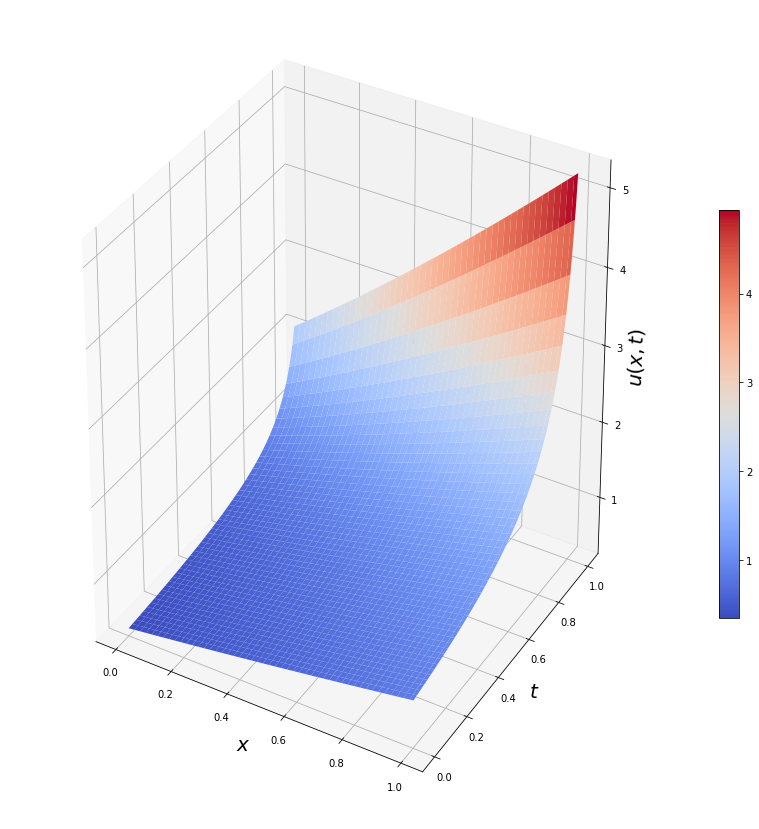

In [4]:
x = np.array([i * h for i in range(u.shape[1])])
t = np.array([i * tau for i in range(u.shape[0])])

XX, YY = np.meshgrid(x, t)
fig = plt.figure(figsize=(15, 15))
graph = plt.axes(projection='3d')
surf = graph.plot_surface(XX, YY, u, cmap="coolwarm")
graph.set_xlabel("$x$", fontsize=20)
graph.set_ylabel("$t$", fontsize=20)
graph.set_zlabel("$u(x, t)$", fontsize=20)
fig.colorbar(surf, shrink=0.5)
plt.grid()

#### Проверка краевых условий

delta = 0.0


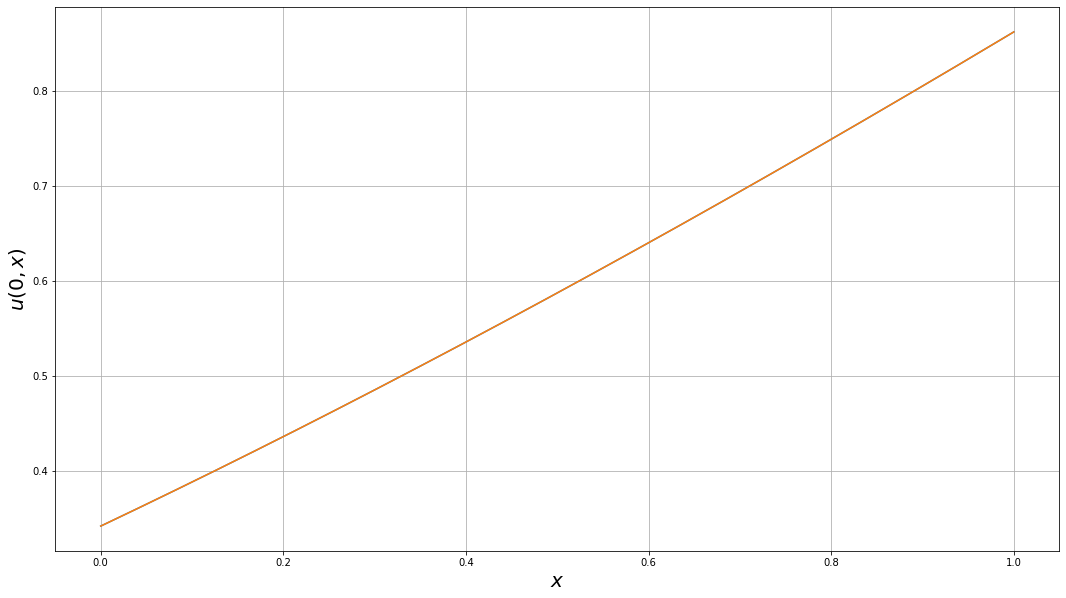

In [ ]:
plt.figure(figsize=[18, 10])
plt.plot(x, u[0])
plt.plot(x, u0x(x))
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$u(0, x)$", fontsize=20)
plt.grid()
print(f'delta = {np.mean(np.abs(u[0] - u0x(x)))}')

delta = 0.0


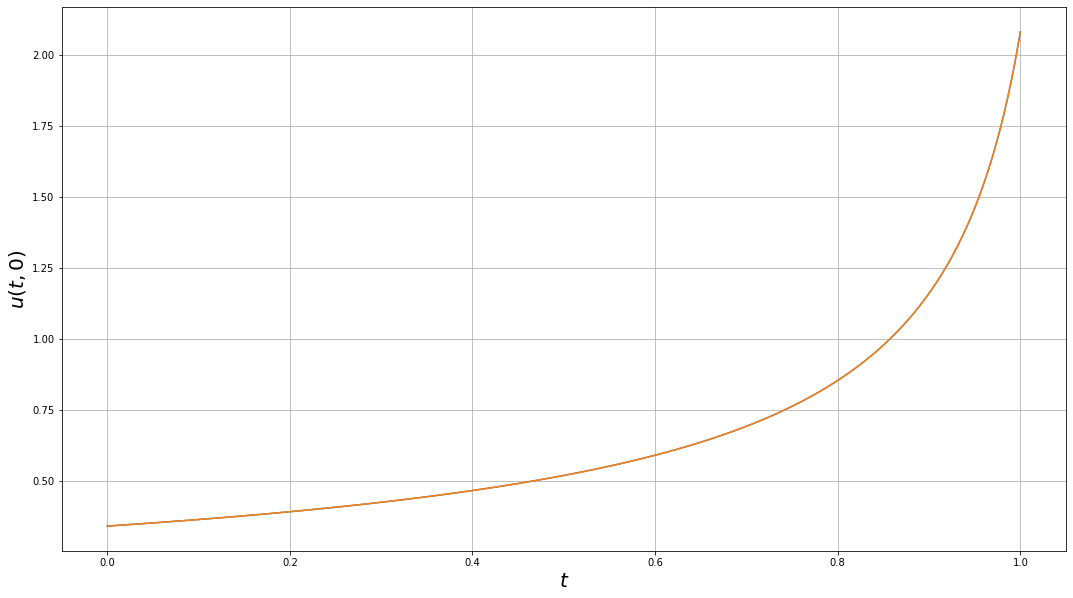

In [ ]:
plt.figure(figsize=[18, 10])
plt.plot(t, u.transpose()[0])
plt.plot(t, ut0(x))
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$u(t, 0)$", fontsize=20)
plt.grid()
print(f'delta = {np.mean(np.abs(u.transpose()[0] - ut0(t)))}')

delta = 1.109113910714442e-19


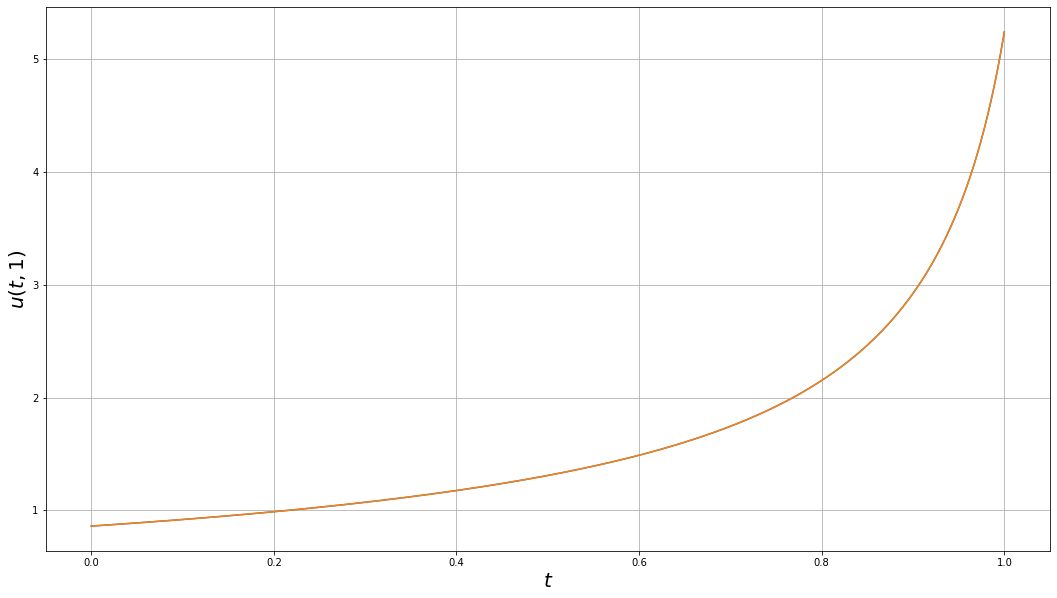

In [ ]:
plt.figure(figsize=[18, 10])
plt.plot(t, u.transpose()[-1])
plt.plot(t, ut1(x))
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$u(t, 1)$", fontsize=20)
plt.grid()
print(f'delta = {np.mean(np.abs(u.transpose()[-1] - ut1(t)))}')

In [5]:
import pandas as pd

In [6]:
k = np.linspace(0, 1.0, 11)
df = pd.DataFrame.from_dict(
    {
        "x": k,
        "u": [u[-1][int(kk / h)] for kk in k]
    }
)
df

,x,u
0,0.0,2.080084
1,0.1,2.361352
2,0.2,2.651581
3,0.3,2.950175
4,0.4,3.256651
5,0.5,3.570603
6,0.6,3.891678
7,0.7,4.219565
8,0.8,4.553990
9,0.9,4.894705


In [ ]:
!sudo apt install ffmpeg
!sudo apt install imagemagick

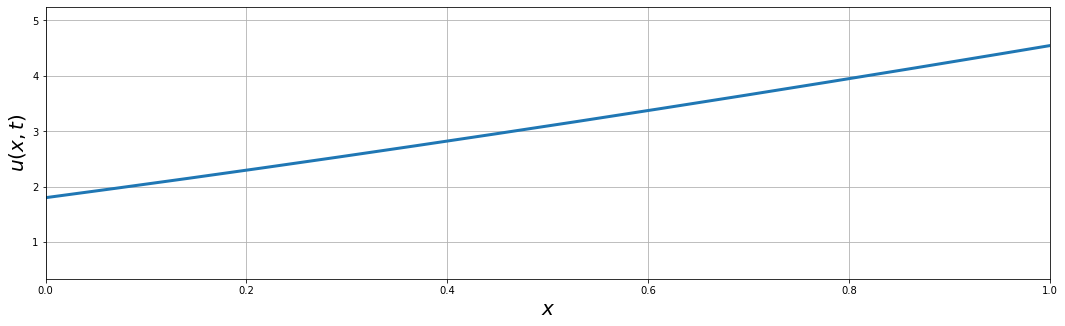

In [ ]:
fig = plt.figure(figsize=(18, 5))
ax = plt.axes(xlim=(0, X), ylim=[np.min(u), np.max(u)])
line, = ax.plot([], [], lw=3)
ax.grid()
ax.set_ylabel("$u(x, t)$", fontsize=20)
ax.set_xlabel("$x$", fontsize=20)

frames_amount = 60

def init():
  line.set_data([], [])
  return line,

def animate(i):
  x = np.array([i * h for i in range(u.shape[1])])
  line.set_data(x, u[int(i / frames_amount * (u.shape[0] - 1))])
  return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=frames_amount, interval=60, blit=True)
anim.save('solution.gif', writer='imagemagick')

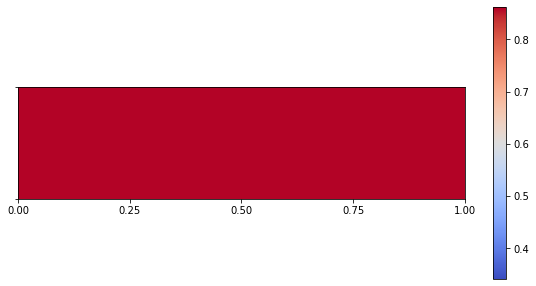

In [ ]:
fr_am = 50
fg = plt.figure(figsize=(10, 5))
ax = plt.axes()
heat = np.array([u[0] for i in range(int(u.shape[0] / 2))])
im = plt.imshow(heat, cmap='coolwarm', extent=[0, X, 0, X / 4])
plt.yticks(np.linspace(0, X / 4, 2), "")
plt.xticks(np.linspace(0, X, 5))
plt.colorbar()

def animation(t):
  idx = int(t / fr_am * (u.shape[0] - 1)) 
  heat = np.array([u[idx] for i in range(int(u.shape[0] / 2))])
  im.set_array(heat)
  return [im]

anim = FuncAnimation(fg, animation, frames=fr_am, interval=60, blit=True)
anim.save('heatmap.gif', writer='imagemagick')